In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [3]:
df_taxi = pd.read_csv("../data/taxi.csv")
df_taxi

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,hour_4_9,hour_10_15,hour_16_15,hour_night,pas0-3,pas4-6
0,-73.953918,40.778873,-73.963875,40.771164,400,0,0,1,0,1,0
1,-73.988312,40.731743,-73.994751,40.694931,1100,0,0,0,1,1,0
2,-73.997314,40.721458,-73.948029,40.774918,1635,0,0,1,0,1,0
3,-73.961670,40.759720,-73.956779,40.780628,1141,1,0,0,0,0,1
4,-74.017120,40.708469,-73.988182,40.740631,848,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
729317,-73.965919,40.789780,-73.952637,40.789181,296,0,1,0,0,1,0
729318,-73.996666,40.737434,-74.001320,40.731911,315,0,0,0,1,1,0
729319,-73.997849,40.761696,-74.001488,40.741207,673,0,0,1,0,1,0
729320,-74.006706,40.708244,-74.013550,40.713814,447,1,0,0,0,1,0


In [4]:
df_cs = pd.read_csv("../data/cs.csv")
df_cs

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
48656,174.94,4.0,14.0,de_dust2,False,500.0,500.0,0.0,269.0,25750.0,27400.0,0.0,3.0,0.0,5.0,5.0
111472,175.00,0.0,0.0,de_overpass,False,500.0,500.0,300.0,400.0,1300.0,600.0,0.0,0.0,1.0,5.0,5.0
62915,94.94,5.0,8.0,de_train,False,500.0,467.0,500.0,387.0,9450.0,200.0,4.0,4.0,4.0,5.0,5.0
19132,175.00,14.0,12.0,de_inferno,False,500.0,500.0,0.0,497.0,16200.0,12650.0,0.0,5.0,0.0,5.0,5.0
90843,175.00,0.0,4.0,de_overpass,False,500.0,500.0,100.0,387.0,17150.0,24000.0,0.0,4.0,0.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122390,12.26,10.0,13.0,de_train,True,180.0,0.0,197.0,0.0,1150.0,0.0,1.0,0.0,1.0,2.0,0.0
122399,20.27,11.0,13.0,de_train,True,174.0,239.0,200.0,284.0,2000.0,2200.0,2.0,3.0,2.0,2.0,3.0
122400,0.24,11.0,13.0,de_train,True,119.0,178.0,182.0,195.0,2300.0,950.0,2.0,2.0,2.0,2.0,2.0
122404,35.41,11.0,14.0,de_train,True,315.0,428.0,382.0,467.0,150.0,5700.0,2.0,5.0,2.0,4.0,5.0


In [5]:
# классификация

scaler = StandardScaler()

X_cs = df_cs.drop(["map", "bomb_planted"], axis=1)
y_cs = df_cs["bomb_planted"].apply(lambda x: 1 if x == True else 0)


X_cs_train, X_cs_test, y_cs_train, y_cs_test = train_test_split(X_cs, y_cs, test_size=0.3, random_state=42)

In [6]:
#pd.DataFrame(X_cs, columns=df_cs.columns.drop(["map", "bomb_planted"])).corrwith(y_cs)
abs(X_cs.corrwith(y_cs))

time_left           0.752562
ct_score            0.022834
t_score             0.020277
ct_health           0.779086
t_health            0.607086
ct_armor            0.475834
t_armor             0.165214
ct_money            0.352817
t_money             0.219795
ct_helmets          0.326614
t_helmets           0.078472
ct_defuse_kits      0.279339
ct_players_alive    0.766254
t_players_alive     0.513686
dtype: float64

In [7]:
parameters = {'criterion': ["gini", "entropy", "log_loss"],
             'max_depth' : range(3, 9)}

tree_classifer = GridSearchCV(DecisionTreeClassifier(), parameters)
tree_classifer = tree_classifer.fit(X_cs_train, y_cs_train).best_estimator_

In [8]:
y_cs_pred = tree_classifer.predict(X_cs_test)
print(f'Accuracy: {accuracy_score(y_cs_test, y_cs_pred)}')
print(f'Precision: {precision_score(y_cs_test, y_cs_pred)}')
print(f'Recall_score: {recall_score(y_cs_test, y_cs_pred)}')
print(f'F1: {f1_score(y_cs_test, y_cs_pred)}')
print(f'ROC_AUC: {roc_auc_score(y_cs_test, y_cs_pred)}')

Accuracy: 0.978801261829653
Precision: 0.9664942103966494
Recall_score: 0.9919089759797725
F1: 0.9790366857998503
ROC_AUC: 0.9788260245138157


In [9]:
text_representation = tree.export_text(tree_classifer)
print(text_representation)

|--- feature_0 <= 40.19
|   |--- feature_5 <= 340.50
|   |   |--- feature_0 <= 34.70
|   |   |   |--- feature_0 <= 14.99
|   |   |   |   |--- feature_0 <= 14.89
|   |   |   |   |   |--- feature_0 <= 14.86
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  14.86
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  14.89
|   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  14.99
|   |   |   |   |--- feature_3 <= 203.50
|   |   |   |   |   |--- feature_0 <= 26.65
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  26.65
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  203.50
|   |   |   |   |   |--- feature_0 <= 26.59
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  26.59
|   |   |   |   |   |   |--- class: 1
|   |   |--- feature_0 >  3

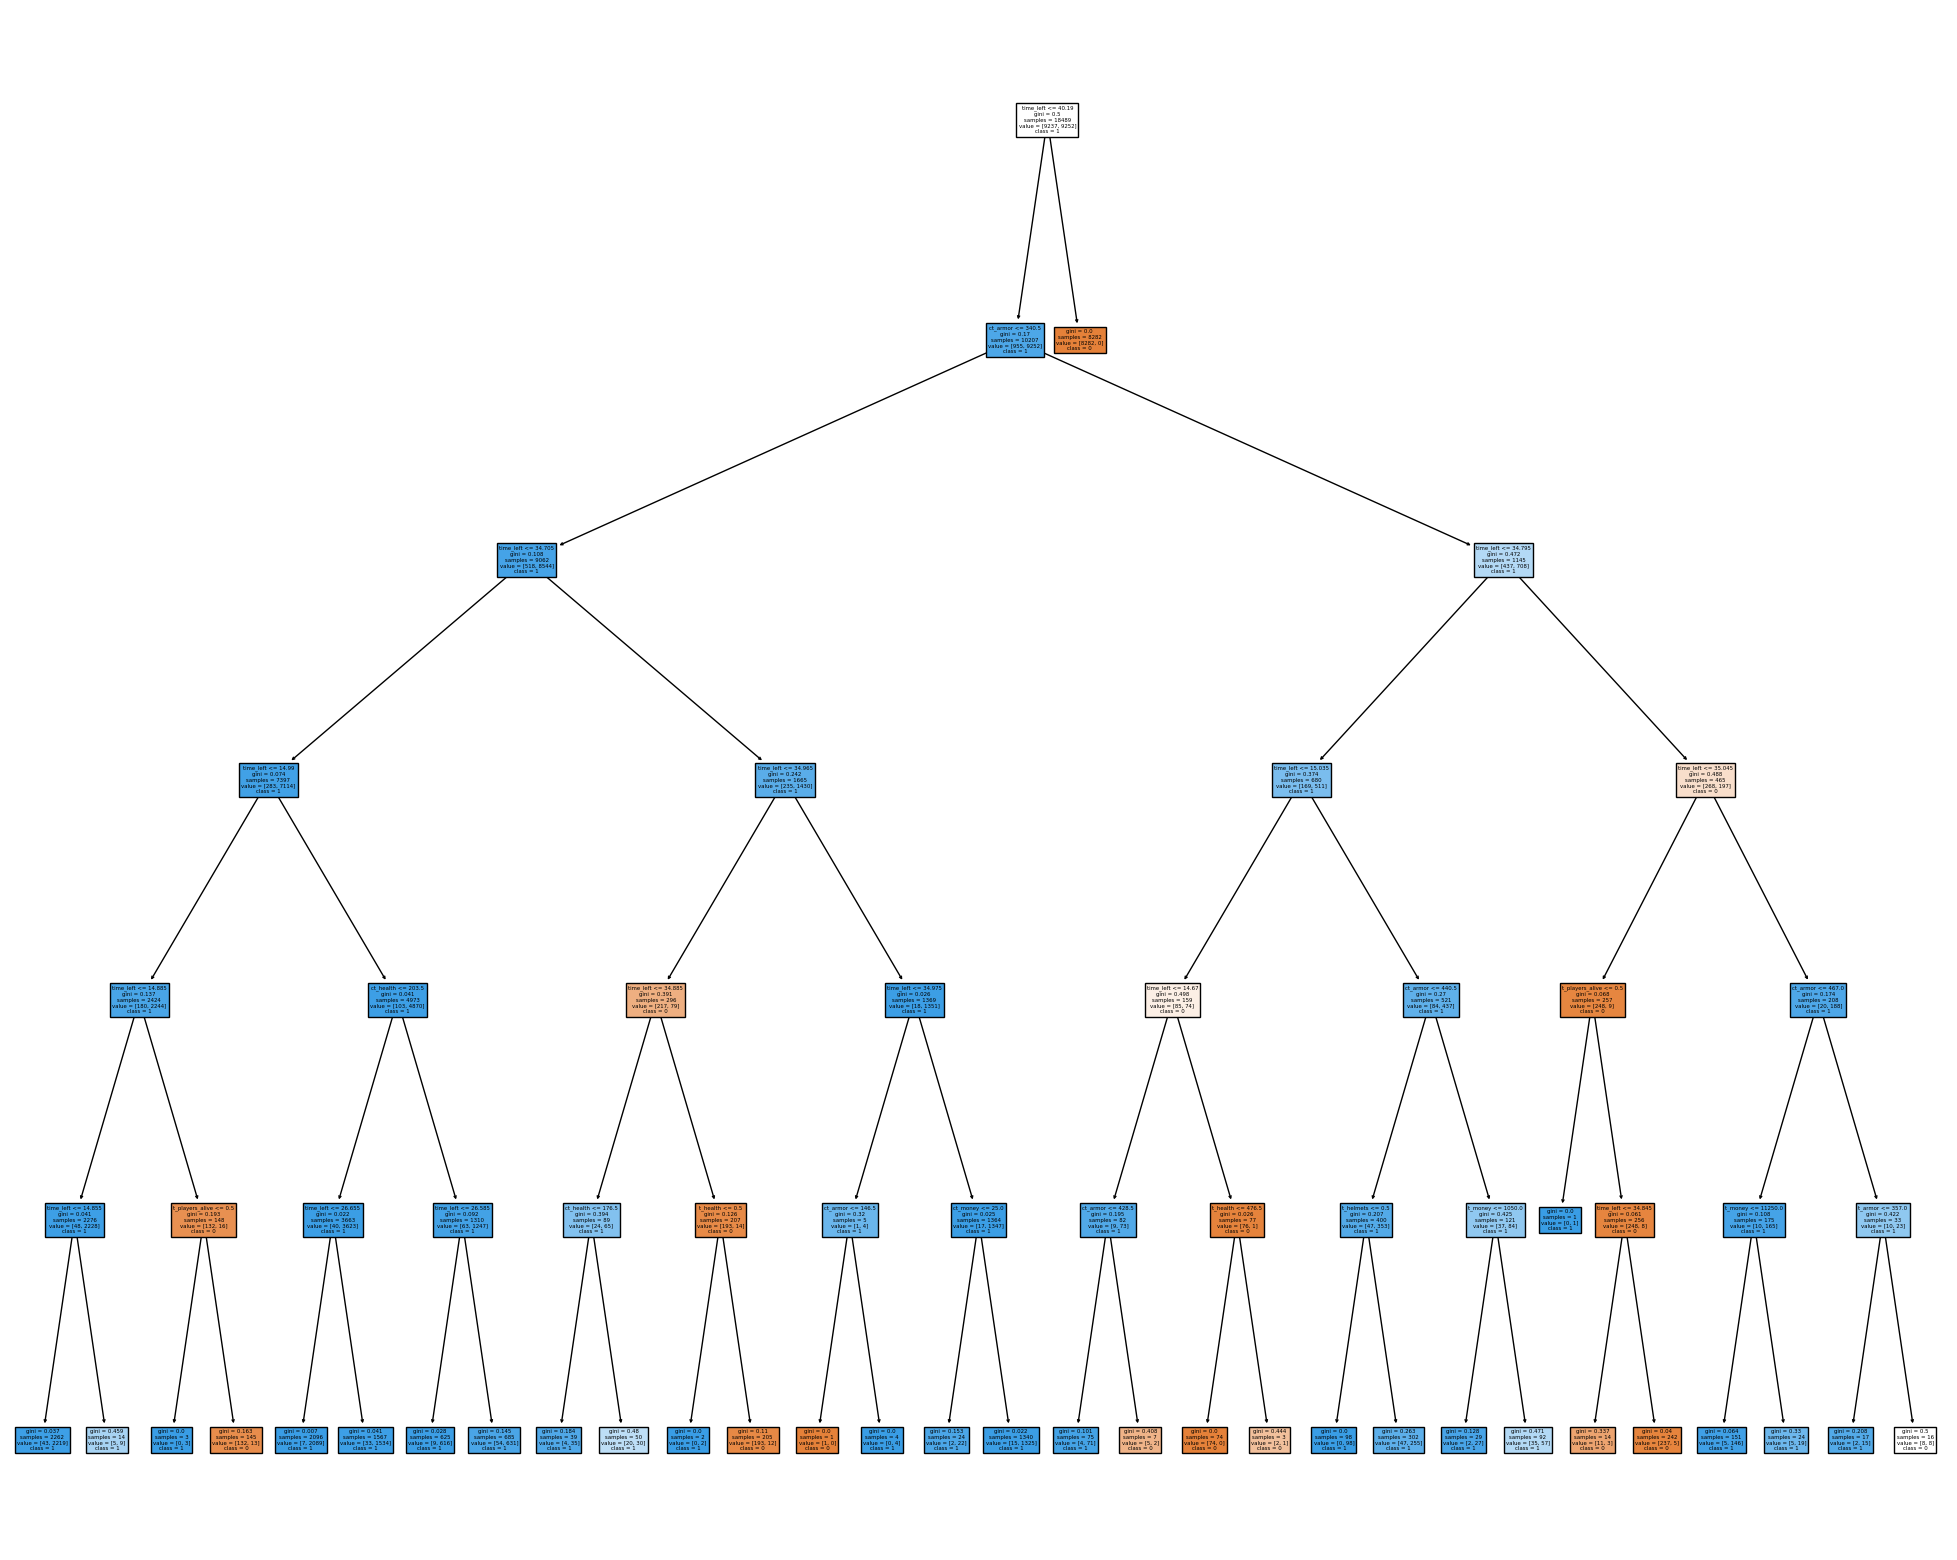

In [12]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_classifer, feature_names=X_cs.columns, class_names=["0", "1"], filled=True)

In [10]:
# регрессия

from sklearn.tree import DecisionTreeRegressor 
#from sklearn.preprocessing import PolynomialFeatures

X_taxi = df_taxi.drop(['trip_duration'], axis = 1)
y_taxi = df_taxi['trip_duration']


X_taxi_train, X_taxi_test, y_taxi_train, y_taxi_test = train_test_split(X_taxi, y_taxi, test_size=0.3, random_state=42)


In [11]:
#parameters = {'criterion' : ["squared_error", "friedman_mse", "absolute_error", "poisson"],
#             "max_depth" : [13]}
#tree_regressor = GridSearchCV(DecisionTreeRegressor(), parameters)
tree_regressor = DecisionTreeRegressor(max_depth = 11)
tree_regressor.fit(X_taxi_train, y_taxi_train)

DecisionTreeRegressor(max_depth=11)

In [12]:
text_representation = tree.export_text(tree_regressor)
print(text_representation)

|--- feature_3 <= 40.72
|   |--- feature_1 <= 40.74
|   |   |--- feature_1 <= 40.73
|   |   |   |--- feature_2 <= -73.97
|   |   |   |   |--- feature_3 <= 40.70
|   |   |   |   |   |--- feature_1 <= 40.70
|   |   |   |   |   |   |--- feature_0 <= -74.01
|   |   |   |   |   |   |   |--- value: [1987.00]
|   |   |   |   |   |   |--- feature_0 >  -74.01
|   |   |   |   |   |   |   |--- feature_3 <= 40.69
|   |   |   |   |   |   |   |   |--- feature_0 <= -73.99
|   |   |   |   |   |   |   |   |   |--- feature_2 <= -73.99
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [990.00]
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [979.00]
|   |   |   |   |   |   |   |   |   |--- feature_2 >  -73.99
|   |   |   |   |   |   |   |   |   |   |--- value: [360.00]
|   |   |   |   |   |   |   |   |--- feature_0 >  -73.99
|   |   |   |   |   |   |   |   |   |--- v

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
y_taxi_pred = tree_regressor.predict(X_taxi_test)
print(f'MAE: {mean_absolute_error(y_taxi_test,y_taxi_pred)}')
print(f'MSE: {mean_squared_error(y_taxi_test, y_taxi_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_taxi_test, y_taxi_pred))}')
print(f'MAPE: {np.sqrt(mean_absolute_percentage_error(y_taxi_test, y_taxi_pred))}')
print(f'R^2: {r2_score(y_taxi_test, y_taxi_pred)}')

MAE: 253.1480579348768
MSE: 124757.61848875358
RMSE: 353.2104450448112
MAPE: 0.8407679011268047
R^2: 0.41207397670072643


In [156]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor

bagging_classifier = BaggingClassifier(n_estimators=20)
bagging_regressor = BaggingRegressor(n_estimators=5)
g_boost_classifier = GradientBoostingClassifier(n_estimators=20)
g_boost_regressor = GradientBoostingRegressor(n_estimators=20)
stacking_classifier = StackingClassifier(estimators=[("Tree_depth_5", DecisionTreeClassifier(max_depth=5)), ("Tree_depth_7", DecisionTreeClassifier(max_depth=7)), ("Tree_depth_9", DecisionTreeClassifier(max_depth=9))])
stacking_regressor = StackingRegressor(estimators=[("Tree_depth_7", DecisionTreeRegressor(max_depth=7)), ("Tree_depth_9", DecisionTreeRegressor(max_depth=9)), ("Tree_depth_11", DecisionTreeRegressor(max_depth=11))])

In [157]:
bagging_classifier.fit(X_cs_train, y_cs_train)
print("bagging_classifier fit complete")
bagging_regressor.fit(X_taxi_train, y_taxi_train)
print("bagging_regressor fit complete")
g_boost_classifier.fit(X_cs_train, y_cs_train)
print("g_boost_classifierr fit complete")
g_boost_regressor.fit(X_taxi_train, y_taxi_train)
print("g_boost_regressor fit complete")
stacking_classifier.fit(X_cs_train, y_cs_train)
print("stacking_classifier fit complete")
stacking_regressor.fit(X_taxi_train, y_taxi_train)
print("stacking_regressor fit complete")

bagging_classifier fit complete
bagging_regressor fit complete
g_boost_classifierr fit complete
g_boost_regressor fit complete
stacking_classifier fit complete
stacking_regressor fit complete


In [160]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
y_cs_pred1 = bagging_classifier.predict(X_cs_test)
y_cs_pred2 = g_boost_classifier.predict(X_cs_test)
y_cs_pred3 = stacking_classifier.predict(X_cs_test)

y_taxi_pred1 = bagging_regressor.predict(X_taxi_test)
y_taxi_pred2 = g_boost_regressor.predict(X_taxi_test)
y_taxi_pred3 = stacking_regressor.predict(X_taxi_test)
print("Accuracy            Precision            Recall            F1            ROC_AUC")
for pred in [y_cs_pred1, y_cs_pred2, y_cs_pred3]:
    print(accuracy_score(y_cs_test, pred), precision_score(y_cs_test, pred), recall_score(y_cs_test, pred), f1_score(y_cs_test, pred), roc_auc_score(y_cs_test, pred))
print("---------")
print("R2               MSE               MAE               MAPE")
for pred in [y_taxi_pred1, y_taxi_pred2, y_taxi_pred3]:
    print(r2_score(y_taxi_test, pred), mean_squared_error(y_taxi_test, pred), mean_absolute_error(y_taxi_test, pred), mean_absolute_percentage_error(y_taxi_test, pred))

Accuracy            Precision            Recall            F1            ROC_AUC
0.9790536277602524 0.9704494661037993 0.9881163084702907 0.9792032072162364 0.9790707486935838
0.9582334384858044 0.9231667445119103 0.9994943109987358 0.9598154667961636 0.9583113872374033
0.978801261829653 0.9674154529745742 0.990897597977244 0.9790157381963527 0.9788241138500829
---------
R2               MSE               MAE               MAPE
0.5208453782510782 101676.37955846352 213.21123824368317 0.4625611842263928
0.17570587874624377 174914.81483470774 311.5125220343701 0.9458514158199143
0.4125810078630442 124650.02672073593 253.68937939819745 0.7216769730540268


In [178]:
from catboost import CatBoostClassifier, CatBoostRegressor

cat_boost_classifier = CatBoostClassifier(iterations=1000)

In [179]:
cat_boost_classifier.fit(X_cs_train, y_cs_train)

Learning rate set to 0.035802
0:	learn: 0.6038983	total: 7.55ms	remaining: 7.54s
1:	learn: 0.5314478	total: 14.6ms	remaining: 7.29s
2:	learn: 0.4755772	total: 22.4ms	remaining: 7.43s
3:	learn: 0.4281400	total: 29.1ms	remaining: 7.23s
4:	learn: 0.3832143	total: 36.1ms	remaining: 7.19s
5:	learn: 0.3510213	total: 44.1ms	remaining: 7.3s
6:	learn: 0.3187201	total: 51.4ms	remaining: 7.29s
7:	learn: 0.2891857	total: 58.4ms	remaining: 7.24s
8:	learn: 0.2719443	total: 65.4ms	remaining: 7.2s
9:	learn: 0.2515122	total: 72.3ms	remaining: 7.16s
10:	learn: 0.2368995	total: 78.9ms	remaining: 7.09s
11:	learn: 0.2238227	total: 87.1ms	remaining: 7.17s
12:	learn: 0.2100945	total: 94.3ms	remaining: 7.16s
13:	learn: 0.1996647	total: 101ms	remaining: 7.12s
14:	learn: 0.1892407	total: 108ms	remaining: 7.1s
15:	learn: 0.1805533	total: 116ms	remaining: 7.13s
16:	learn: 0.1715125	total: 123ms	remaining: 7.11s
17:	learn: 0.1651204	total: 130ms	remaining: 7.09s
18:	learn: 0.1587428	total: 137ms	remaining: 7.07s
1

165:	learn: 0.0604675	total: 1.49s	remaining: 7.48s
166:	learn: 0.0603606	total: 1.5s	remaining: 7.47s
167:	learn: 0.0603116	total: 1.51s	remaining: 7.48s
168:	learn: 0.0602206	total: 1.52s	remaining: 7.47s
169:	learn: 0.0601893	total: 1.53s	remaining: 7.46s
170:	learn: 0.0600777	total: 1.53s	remaining: 7.44s
171:	learn: 0.0599630	total: 1.54s	remaining: 7.43s
172:	learn: 0.0598761	total: 1.55s	remaining: 7.41s
173:	learn: 0.0597144	total: 1.56s	remaining: 7.39s
174:	learn: 0.0596666	total: 1.56s	remaining: 7.37s
175:	learn: 0.0595366	total: 1.57s	remaining: 7.35s
176:	learn: 0.0594803	total: 1.58s	remaining: 7.33s
177:	learn: 0.0593630	total: 1.58s	remaining: 7.32s
178:	learn: 0.0592585	total: 1.59s	remaining: 7.31s
179:	learn: 0.0591084	total: 1.6s	remaining: 7.29s
180:	learn: 0.0589901	total: 1.61s	remaining: 7.27s
181:	learn: 0.0588066	total: 1.62s	remaining: 7.26s
182:	learn: 0.0587447	total: 1.62s	remaining: 7.25s
183:	learn: 0.0586902	total: 1.63s	remaining: 7.23s
184:	learn: 0.

325:	learn: 0.0497398	total: 3.13s	remaining: 6.46s
326:	learn: 0.0497216	total: 3.14s	remaining: 6.46s
327:	learn: 0.0496631	total: 3.15s	remaining: 6.45s
328:	learn: 0.0495729	total: 3.16s	remaining: 6.44s
329:	learn: 0.0495435	total: 3.16s	remaining: 6.42s
330:	learn: 0.0495022	total: 3.17s	remaining: 6.41s
331:	learn: 0.0494374	total: 3.18s	remaining: 6.4s
332:	learn: 0.0493963	total: 3.19s	remaining: 6.39s
333:	learn: 0.0493070	total: 3.2s	remaining: 6.38s
334:	learn: 0.0492685	total: 3.21s	remaining: 6.36s
335:	learn: 0.0491267	total: 3.21s	remaining: 6.35s
336:	learn: 0.0490711	total: 3.22s	remaining: 6.33s
337:	learn: 0.0489504	total: 3.23s	remaining: 6.32s
338:	learn: 0.0488826	total: 3.24s	remaining: 6.32s
339:	learn: 0.0488251	total: 3.25s	remaining: 6.32s
340:	learn: 0.0487914	total: 3.27s	remaining: 6.32s
341:	learn: 0.0487438	total: 3.28s	remaining: 6.31s
342:	learn: 0.0486633	total: 3.29s	remaining: 6.31s
343:	learn: 0.0486044	total: 3.31s	remaining: 6.31s
344:	learn: 0.

484:	learn: 0.0418543	total: 4.81s	remaining: 5.11s
485:	learn: 0.0418413	total: 4.82s	remaining: 5.1s
486:	learn: 0.0418155	total: 4.84s	remaining: 5.09s
487:	learn: 0.0417936	total: 4.85s	remaining: 5.09s
488:	learn: 0.0417653	total: 4.86s	remaining: 5.08s
489:	learn: 0.0417060	total: 4.87s	remaining: 5.07s
490:	learn: 0.0416691	total: 4.88s	remaining: 5.06s
491:	learn: 0.0416155	total: 4.89s	remaining: 5.04s
492:	learn: 0.0415870	total: 4.89s	remaining: 5.03s
493:	learn: 0.0415754	total: 4.9s	remaining: 5.02s
494:	learn: 0.0415442	total: 4.91s	remaining: 5.01s
495:	learn: 0.0415172	total: 4.92s	remaining: 5s
496:	learn: 0.0414922	total: 4.93s	remaining: 4.99s
497:	learn: 0.0414768	total: 4.94s	remaining: 4.98s
498:	learn: 0.0414360	total: 4.94s	remaining: 4.96s
499:	learn: 0.0413836	total: 4.95s	remaining: 4.95s
500:	learn: 0.0413340	total: 4.96s	remaining: 4.94s
501:	learn: 0.0413043	total: 4.97s	remaining: 4.93s
502:	learn: 0.0412829	total: 4.98s	remaining: 4.92s
503:	learn: 0.041

649:	learn: 0.0361113	total: 6.28s	remaining: 3.38s
650:	learn: 0.0360696	total: 6.29s	remaining: 3.37s
651:	learn: 0.0360525	total: 6.3s	remaining: 3.36s
652:	learn: 0.0360307	total: 6.31s	remaining: 3.35s
653:	learn: 0.0359915	total: 6.32s	remaining: 3.34s
654:	learn: 0.0359491	total: 6.33s	remaining: 3.33s
655:	learn: 0.0359180	total: 6.33s	remaining: 3.32s
656:	learn: 0.0358742	total: 6.34s	remaining: 3.31s
657:	learn: 0.0358452	total: 6.35s	remaining: 3.3s
658:	learn: 0.0358216	total: 6.36s	remaining: 3.29s
659:	learn: 0.0357942	total: 6.37s	remaining: 3.28s
660:	learn: 0.0357630	total: 6.38s	remaining: 3.27s
661:	learn: 0.0357456	total: 6.38s	remaining: 3.26s
662:	learn: 0.0356917	total: 6.39s	remaining: 3.25s
663:	learn: 0.0356848	total: 6.4s	remaining: 3.24s
664:	learn: 0.0356612	total: 6.41s	remaining: 3.23s
665:	learn: 0.0356065	total: 6.42s	remaining: 3.22s
666:	learn: 0.0355921	total: 6.43s	remaining: 3.21s
667:	learn: 0.0355462	total: 6.43s	remaining: 3.2s
668:	learn: 0.03

821:	learn: 0.0312786	total: 7.75s	remaining: 1.68s
822:	learn: 0.0312335	total: 7.76s	remaining: 1.67s
823:	learn: 0.0312022	total: 7.77s	remaining: 1.66s
824:	learn: 0.0311507	total: 7.79s	remaining: 1.65s
825:	learn: 0.0311507	total: 7.79s	remaining: 1.64s
826:	learn: 0.0311477	total: 7.8s	remaining: 1.63s
827:	learn: 0.0311476	total: 7.81s	remaining: 1.62s
828:	learn: 0.0311096	total: 7.82s	remaining: 1.61s
829:	learn: 0.0311096	total: 7.83s	remaining: 1.6s
830:	learn: 0.0311096	total: 7.84s	remaining: 1.59s
831:	learn: 0.0311096	total: 7.84s	remaining: 1.58s
832:	learn: 0.0311096	total: 7.85s	remaining: 1.57s
833:	learn: 0.0311095	total: 7.86s	remaining: 1.56s
834:	learn: 0.0311095	total: 7.87s	remaining: 1.55s
835:	learn: 0.0311095	total: 7.88s	remaining: 1.54s
836:	learn: 0.0311095	total: 7.88s	remaining: 1.53s
837:	learn: 0.0311081	total: 7.89s	remaining: 1.52s
838:	learn: 0.0310945	total: 7.89s	remaining: 1.51s
839:	learn: 0.0310672	total: 7.9s	remaining: 1.5s
840:	learn: 0.03

In [180]:
y_cs_predict = cat_boost_classifier.predict(X_cs_test)
print(f'Accuracy: {accuracy_score(y_cs_test, y_cs_pred)}')
print(f'Precision: {precision_score(y_cs_test, y_cs_pred)}')
print(f'Recall_score: {recall_score(y_cs_test, y_cs_pred)}')
print(f'F1: {f1_score(y_cs_test, y_cs_pred)}')
print(f'ROC_AUC: {roc_auc_score(y_cs_test, y_cs_pred)}')

Accuracy: 0.9777917981072555
Precision: 0.9706102117061021
Recall_score: 0.9853350189633375
F1: 0.9779171894604767
ROC_AUC: 0.97780604852449


In [187]:
cat_boost_regressor = CatBoostRegressor(iterations=1000)
cat_boost_regressor.fit(X_taxi_train, y_taxi_train)

Learning rate set to 0.107118
0:	learn: 442.0437165	total: 51.8ms	remaining: 51.7s
1:	learn: 430.7776122	total: 102ms	remaining: 50.7s
2:	learn: 421.4401160	total: 152ms	remaining: 50.4s
3:	learn: 413.3473731	total: 202ms	remaining: 50.2s
4:	learn: 405.7583365	total: 256ms	remaining: 50.9s
5:	learn: 399.8652739	total: 303ms	remaining: 50.3s
6:	learn: 394.8233350	total: 351ms	remaining: 49.8s
7:	learn: 390.4821324	total: 398ms	remaining: 49.4s
8:	learn: 384.3356031	total: 448ms	remaining: 49.3s
9:	learn: 379.0748082	total: 493ms	remaining: 48.8s
10:	learn: 376.2060643	total: 542ms	remaining: 48.8s
11:	learn: 372.5289388	total: 615ms	remaining: 50.6s
12:	learn: 367.7746556	total: 671ms	remaining: 51s
13:	learn: 364.9387475	total: 739ms	remaining: 52s
14:	learn: 361.6258701	total: 805ms	remaining: 52.9s
15:	learn: 358.7542486	total: 884ms	remaining: 54.4s
16:	learn: 356.8741435	total: 939ms	remaining: 54.3s
17:	learn: 353.9751625	total: 994ms	remaining: 54.2s
18:	learn: 352.1734433	total:

157:	learn: 295.6993167	total: 8.16s	remaining: 43.5s
158:	learn: 295.5941488	total: 8.23s	remaining: 43.6s
159:	learn: 295.5385630	total: 8.29s	remaining: 43.6s
160:	learn: 295.4685796	total: 8.36s	remaining: 43.6s
161:	learn: 295.3772938	total: 8.41s	remaining: 43.5s
162:	learn: 295.2704066	total: 8.46s	remaining: 43.4s
163:	learn: 295.1695546	total: 8.52s	remaining: 43.4s
164:	learn: 295.0897992	total: 8.59s	remaining: 43.4s
165:	learn: 295.0256090	total: 8.65s	remaining: 43.5s
166:	learn: 294.9574262	total: 8.71s	remaining: 43.4s
167:	learn: 294.8648318	total: 8.77s	remaining: 43.4s
168:	learn: 294.7863126	total: 8.84s	remaining: 43.5s
169:	learn: 294.6902800	total: 8.9s	remaining: 43.5s
170:	learn: 294.6235397	total: 8.97s	remaining: 43.5s
171:	learn: 294.5870960	total: 9.01s	remaining: 43.4s
172:	learn: 294.5013533	total: 9.06s	remaining: 43.3s
173:	learn: 294.4503481	total: 9.13s	remaining: 43.4s
174:	learn: 294.3876537	total: 9.2s	remaining: 43.4s
175:	learn: 294.3110072	total:

311:	learn: 288.3911753	total: 16.9s	remaining: 37.2s
312:	learn: 288.3692607	total: 16.9s	remaining: 37.2s
313:	learn: 288.3442539	total: 17s	remaining: 37.1s
314:	learn: 288.3225071	total: 17s	remaining: 37.1s
315:	learn: 288.2915847	total: 17.1s	remaining: 37s
316:	learn: 288.2732915	total: 17.1s	remaining: 37s
317:	learn: 288.2533341	total: 17.2s	remaining: 36.9s
318:	learn: 288.2302425	total: 17.2s	remaining: 36.8s
319:	learn: 288.2130462	total: 17.3s	remaining: 36.8s
320:	learn: 288.1900083	total: 17.3s	remaining: 36.7s
321:	learn: 288.1675082	total: 17.4s	remaining: 36.7s
322:	learn: 288.1467817	total: 17.5s	remaining: 36.6s
323:	learn: 288.1313467	total: 17.5s	remaining: 36.5s
324:	learn: 288.1058780	total: 17.5s	remaining: 36.4s
325:	learn: 288.0871061	total: 17.6s	remaining: 36.4s
326:	learn: 288.0496643	total: 17.6s	remaining: 36.3s
327:	learn: 288.0303758	total: 17.7s	remaining: 36.3s
328:	learn: 288.0130150	total: 17.7s	remaining: 36.2s
329:	learn: 287.9875168	total: 17.8s

466:	learn: 285.2666049	total: 25.7s	remaining: 29.4s
467:	learn: 285.2550756	total: 25.8s	remaining: 29.3s
468:	learn: 285.2408232	total: 25.8s	remaining: 29.2s
469:	learn: 285.2205264	total: 25.9s	remaining: 29.2s
470:	learn: 285.2038725	total: 26s	remaining: 29.2s
471:	learn: 285.1871967	total: 26.1s	remaining: 29.2s
472:	learn: 285.1742100	total: 26.2s	remaining: 29.2s
473:	learn: 285.1633475	total: 26.3s	remaining: 29.2s
474:	learn: 285.1530970	total: 26.3s	remaining: 29.1s
475:	learn: 285.1343867	total: 26.4s	remaining: 29.1s
476:	learn: 285.1211715	total: 26.5s	remaining: 29s
477:	learn: 285.1097394	total: 26.5s	remaining: 29s
478:	learn: 285.0938191	total: 26.6s	remaining: 28.9s
479:	learn: 285.0799625	total: 26.7s	remaining: 28.9s
480:	learn: 285.0623140	total: 26.7s	remaining: 28.9s
481:	learn: 285.0501020	total: 26.8s	remaining: 28.8s
482:	learn: 285.0361416	total: 26.8s	remaining: 28.7s
483:	learn: 285.0243176	total: 26.9s	remaining: 28.7s
484:	learn: 284.9982892	total: 27s

622:	learn: 283.2502718	total: 35.1s	remaining: 21.2s
623:	learn: 283.2350583	total: 35.1s	remaining: 21.2s
624:	learn: 283.2285690	total: 35.2s	remaining: 21.1s
625:	learn: 283.2167564	total: 35.2s	remaining: 21.1s
626:	learn: 283.2004520	total: 35.3s	remaining: 21s
627:	learn: 283.1901086	total: 35.3s	remaining: 20.9s
628:	learn: 283.1817098	total: 35.4s	remaining: 20.9s
629:	learn: 283.1707104	total: 35.5s	remaining: 20.8s
630:	learn: 283.1628878	total: 35.5s	remaining: 20.8s
631:	learn: 283.1522415	total: 35.6s	remaining: 20.7s
632:	learn: 283.1438834	total: 35.6s	remaining: 20.7s
633:	learn: 283.1366105	total: 35.7s	remaining: 20.6s
634:	learn: 283.1236171	total: 35.7s	remaining: 20.5s
635:	learn: 283.1107274	total: 35.8s	remaining: 20.5s
636:	learn: 283.0967357	total: 35.9s	remaining: 20.4s
637:	learn: 283.0811666	total: 36s	remaining: 20.4s
638:	learn: 283.0671931	total: 36s	remaining: 20.4s
639:	learn: 283.0603518	total: 36.1s	remaining: 20.3s
640:	learn: 283.0400875	total: 36.

777:	learn: 281.7336343	total: 44.6s	remaining: 12.7s
778:	learn: 281.7270448	total: 44.6s	remaining: 12.7s
779:	learn: 281.7182442	total: 44.7s	remaining: 12.6s
780:	learn: 281.7084864	total: 44.7s	remaining: 12.5s
781:	learn: 281.6975268	total: 44.8s	remaining: 12.5s
782:	learn: 281.6879553	total: 44.8s	remaining: 12.4s
783:	learn: 281.6747599	total: 44.9s	remaining: 12.4s
784:	learn: 281.6680791	total: 44.9s	remaining: 12.3s
785:	learn: 281.6583917	total: 45s	remaining: 12.3s
786:	learn: 281.6504600	total: 45.1s	remaining: 12.2s
787:	learn: 281.6425921	total: 45.1s	remaining: 12.1s
788:	learn: 281.6358260	total: 45.2s	remaining: 12.1s
789:	learn: 281.6272535	total: 45.2s	remaining: 12s
790:	learn: 281.6160509	total: 45.3s	remaining: 12s
791:	learn: 281.6027816	total: 45.4s	remaining: 11.9s
792:	learn: 281.5945580	total: 45.4s	remaining: 11.9s
793:	learn: 281.5876628	total: 45.5s	remaining: 11.8s
794:	learn: 281.5799231	total: 45.6s	remaining: 11.8s
795:	learn: 281.5720138	total: 45.

932:	learn: 280.4278834	total: 53.6s	remaining: 3.85s
933:	learn: 280.4180680	total: 53.6s	remaining: 3.79s
934:	learn: 280.4098526	total: 53.7s	remaining: 3.73s
935:	learn: 280.4018998	total: 53.8s	remaining: 3.68s
936:	learn: 280.3923854	total: 53.8s	remaining: 3.62s
937:	learn: 280.3845434	total: 53.9s	remaining: 3.56s
938:	learn: 280.3760790	total: 54s	remaining: 3.5s
939:	learn: 280.3689155	total: 54s	remaining: 3.45s
940:	learn: 280.3567333	total: 54.1s	remaining: 3.39s
941:	learn: 280.3490321	total: 54.1s	remaining: 3.33s
942:	learn: 280.3414430	total: 54.2s	remaining: 3.27s
943:	learn: 280.3352355	total: 54.3s	remaining: 3.22s
944:	learn: 280.3307300	total: 54.3s	remaining: 3.16s
945:	learn: 280.3253499	total: 54.4s	remaining: 3.1s
946:	learn: 280.3162877	total: 54.4s	remaining: 3.04s
947:	learn: 280.3084607	total: 54.5s	remaining: 2.99s
948:	learn: 280.2988935	total: 54.5s	remaining: 2.93s
949:	learn: 280.2912552	total: 54.6s	remaining: 2.87s
950:	learn: 280.2855681	total: 54.

In [188]:
y_taxi_pred = cat_boost_regressor.predict(X_taxi_test)
print(f'MAE: {mean_absolute_error(y_taxi_test,y_taxi_pred)}')
print(f'MSE: {mean_squared_error(y_taxi_test, y_taxi_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_taxi_test, y_taxi_pred))}')
print(f'MAPE: {np.sqrt(mean_absolute_percentage_error(y_taxi_test, y_taxi_pred))}')
print(f'R^2: {r2_score(y_taxi_test, y_taxi_pred)}')

MAE: 193.35474595202834
MSE: 84045.43685135145
RMSE: 289.90591034222024
MAPE: 0.6715931043284905
R^2: 0.6039320078162631


In [131]:
from collections import Counter
class Node:
    def __init__(self, feature = None, threshold = None, left = None, right = None, *, value = None):
        self.feature = feature #функция или индекс параметра по которому установлен порог
        self.threshold = threshold #порог
        self.left = left #указатель на левый узел
        self.right = right #на правый узел
        self.value = value #значения внутри
    def is_leaf_node(self): #проверка на лист (на конечный узел)
        return self.value is not None

class MyDecisionTreeClassifier:
    def __init__(self, min_samples_split = 2, max_depth = 5, n_features = None):
        self.min_samples_split = min_samples_split #минимальное возможное кол-во объектов для разбиения
        self.max_depth = max_depth #максимальная глубина\
        self.n_features = n_features #кол-во функций
        self.root = None #корень
        
    def fit(self, X_pd, y_pd):
        #проверка на наличие значения кол-ва функций
        X, y = np.array(X_pd), np.array(y_pd)
        if not self.n_features:
            self.n_features = X.shape[1]
        else:
            self.n_features = min(X.shape[1], self.n_features)
            
        self.root = self._grow_tree(X, y)
        
    def _grow_tree(self, X, y, depth = 0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y)) #определяем кол-во найденных классов для разбиения

        #проверка критерия остановки
        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y) #определяем самый распространенный класс
            return Node(value = leaf_value)
        
        feat_idx = np.random.choice(n_feats, self.n_features, replace = False) #случайный выбор n_features функций из n_feats с запретом на повторение
        
        #нахождение лучшего разбиения
        best_feature, best_threshold =  self._best_split(X, y, feat_idx)
        
        #создание дочерних узлов
        left_idxs, right_idxs = self._split(X[:, best_feature], best_threshold)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_threshold, left, right)

        # вызвать def внутри созданных узлов 
    
    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None
        
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx] #!!
            thresholds = np.unique(X_column)        
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)#расчет прироста информации
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = threshold
                    
        return split_idx, split_threshold
    
    def _information_gain(self, y, X_column, threshold): #E(parent) - [weighted average] * E(child) ||| E - энтропия
        #энропия родителя
        parent_entropy = self._entropy(y)
        #создание потомка
        left_idxs, right_idxs = self._split(X_column, threshold)
        
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        #средняя энтропия детей
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_enropy = (n_l/n) * e_l + (n_r/n) * e_r 
        
        #информационный прирост
        
        information_gain = parent_entropy - child_enropy
        return information_gain
        
    def _split(self, X_column, threshold):
        left_idxs = np.argwhere(X_column <= threshold).flatten()
        right_idxs = np.argwhere(X_column > threshold).flatten()
        return left_idxs, right_idxs
    
    def _entropy(self, y): #-sum(p(X) * log2(p(X)))
        hist = np.bincount(y)
        pX_all = hist / len(y)
        return - np.sum([p * np.log2(p) for p in pX_all if p > 0])
            
    def _most_common_label(self, y):
        counter = Counter(y)
        return counter.most_common(1)[0][0]
    
    def predict(self, X):
        
        return np.array([self._traverse_tree(x, self.root) for x in np.array(X)])
    
    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)
            
        

In [132]:
my_tree_classifier = MyDecisionTreeClassifier(max_depth=4)
my_tree_classifier.fit(X_cs_train, y_cs_train)

In [133]:
y_cs_pred = my_tree_classifier.predict(X_cs_test)
print(f'Accuracy: {accuracy_score(y_cs_test, y_cs_pred)}')
print(f'Precision: {precision_score(y_cs_test, y_cs_pred)}')
print(f'Recall_score: {recall_score(y_cs_test, y_cs_pred)}')
print(f'F1: {f1_score(y_cs_test, y_cs_pred)}')
print(f'ROC_AUC: {roc_auc_score(y_cs_test, y_cs_pred)}')

Accuracy: 0.9674447949526814
Precision: 0.95228774161977
Recall_score: 0.984070796460177
F1: 0.9679184282516787
ROC_AUC: 0.9674762042754285


In [122]:
a= [0, 1, 2, 3, 3, 2, 5, 2, 1, 3]
hist = np.bincount(a)
pX_all = hist / len(a)
print(pX_all)
print(sorted(a)[-1])

[0.1 0.2 0.3 0.3 0.  0.1]
5


In [274]:
class Node:
    def __init__(self, feature = None, threshold = None, left = None, right = None, *, value = None):
        self.feature = feature #функция или индекс параметра по которому установлен порог
        self.threshold = threshold #порог
        self.left = left #указатель на левый узел
        self.right = right #на правый узел
        self.value = value #значения внутри
    def is_leaf_node(self): #проверка на лист (на конечный узел)
        return self.value is not None

class MyDecisionTreeRegressor:
    def __init__(self, min_samples_split = 2, max_depth = 5, n_features = None):
        self.min_samples_split = min_samples_split #минимальное возможное кол-во объектов для разбиения
        self.max_depth = max_depth #максимальная глубина\
        self.n_features = n_features #кол-во функций
        self.root = None #корень
        
    def fit(self, X_pd, y_pd):
        #проверка на наличие значения кол-ва функций
        X, y = np.array(X_pd), np.array(y_pd)
        if not self.n_features:
            self.n_features = X.shape[1]
        else:
            self.n_features = min(X.shape[1], self.n_features)
            
        self.root = self._grow_tree(X, y)
        
    def _grow_tree(self, X, y, depth = 0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y)) #определяем кол-во найденных классов для разбиения

        #проверка критерия остановки
        if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y) #определяем самый распространенный класс
            return Node(value = leaf_value)
        
        feat_idx = np.random.choice(n_feats, self.n_features, replace = False) #случайный выбор n_features функций из n_feats с запретом на повторение
        
        #нахождение лучшего разбиения
        best_feature, best_threshold =  self._best_split(X, y, feat_idx)
        
        #создание дочерних узлов
        left_idxs, right_idxs = self._split(X[:, best_feature], best_threshold)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_threshold, left, right)

        # вызвать def внутри созданных узлов 
    
    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None
        for feat_idx in feat_idxs:
            len1 = len(feat_idxs)
            X_column = X[:, feat_idx] #!!
            #------
            
            #thresholds = np.unique(X_column)
            
            #------
            uniq = sorted(np.unique(X_column))
            uniq_len = len(uniq)
            if uniq_len > 100:
                thresholds = [uniq[0] + i * (uniq[-1] - uniq[0]) / 100 for i in range(100)]
            else:
                thresholds = uniq
            #------
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)#расчет прироста информации
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = threshold
        return split_idx, split_threshold
    
    def _information_gain(self, y, X_column, threshold): 

        #(энропия родителя) -> замена на подсчет информативности с использованием MSE

        parent_info = self._info(y)
        #создание потомка
        left_idxs, right_idxs = self._split(X_column, threshold)
        
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        #средняя энтропия детей
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        
        info_l, info_r = self._info(y[left_idxs]), self._info(y[right_idxs])
        child_info = (n_l/n) * info_l + (n_r/n) * info_r 
        
        #информационный прирост
        
        information_gain = parent_info - child_info
        return information_gain
        
    def _split(self, X_column, threshold):
        left_idxs = np.argwhere(X_column <= threshold).flatten()
        right_idxs = np.argwhere(X_column > threshold).flatten()
        return left_idxs, right_idxs
    
    def _info(self, y): # 1/|X| * sum((y - y*)^2), y* - среднее значение
        y_len = len(y)
        y_mean = sum(y)/y_len
        return 1/y_len * sum([(yi - y_mean) ** 2 for yi in y])
            
    def _most_common_label(self, y):
        counter = Counter(y)
        return counter.most_common(1)[0][0]
    
    def predict(self, X):
        
        return np.array([self._traverse_tree(x, self.root) for x in np.array(X)])
    
    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)
  

In [269]:
from sklearn.datasets import make_regression
Xmr, ymr = make_regression(n_samples=5000, n_features=4, noise=30, random_state=42)
X1_taxi_train, X1_taxi_test, y1_taxi_train, y1_taxi_test = train_test_split(Xmr, ymr, test_size=0.3)

In [270]:
my_tree_regressor = MyDecisionTreeRegressor(max_depth=7)
my_tree_regressor.fit(X1_taxi_train, y1_taxi_train)

In [271]:
y_taxi_pred = my_tree_regressor.predict(X1_taxi_test)
print(f'MAE: {mean_absolute_error(y1_taxi_test,y_taxi_pred)}')
print(f'MSE: {mean_squared_error(y1_taxi_test, y_taxi_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y1_taxi_test, y_taxi_pred))}')
print(f'MAPE: {np.sqrt(mean_absolute_percentage_error(y1_taxi_test, y_taxi_pred))}')
print(f'R^2: {r2_score(y1_taxi_test, y_taxi_pred)}')

MAE: 54.47215222531103
MSE: 4824.13261605551
RMSE: 69.45597610037245
MAPE: 1.9362766167885064
R^2: 0.7976883782630648


In [275]:
my_tree_regressor = MyDecisionTreeRegressor(max_depth=7)
my_tree_regressor.fit(X1_taxi_train, y1_taxi_train)

In [276]:
y_taxi_pred = my_tree_regressor.predict(X1_taxi_test)
print(f'MAE: {mean_absolute_error(y1_taxi_test,y_taxi_pred)}')
print(f'MSE: {mean_squared_error(y1_taxi_test, y_taxi_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y1_taxi_test, y_taxi_pred))}')
print(f'MAPE: {np.sqrt(mean_absolute_percentage_error(y1_taxi_test, y_taxi_pred))}')
print(f'R^2: {r2_score(y1_taxi_test, y_taxi_pred)}')

MAE: 60.2660189360915
MSE: 5612.621847961679
RMSE: 74.91743353827384
MAPE: 1.888532605205576
R^2: 0.7646211829919115


In [272]:
my_tree_regressor = DecisionTreeRegressor(max_depth=7)
my_tree_regressor.fit(X1_taxi_train, y1_taxi_train)

DecisionTreeRegressor(max_depth=7)

In [273]:
y_taxi_pred = my_tree_regressor.predict(X1_taxi_test)
print(f'MAE: {mean_absolute_error(y1_taxi_test,y_taxi_pred)}')
print(f'MSE: {mean_squared_error(y1_taxi_test, y_taxi_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y1_taxi_test, y_taxi_pred))}')
print(f'MAPE: {np.sqrt(mean_absolute_percentage_error(y1_taxi_test, y_taxi_pred))}')
print(f'R^2: {r2_score(y1_taxi_test, y_taxi_pred)}')

MAE: 45.228021871258
MSE: 3224.5877834507114
RMSE: 56.78545397767558
MAPE: 1.571515080881618
R^2: 0.8647691438390764


In [290]:
my_tree_regressor = MyDecisionTreeRegressor(max_depth=11)
my_tree_regressor.fit(X_taxi_train, y_taxi_train)

In [291]:
y_taxi_pred = my_tree_regressor.predict(X_taxi_test)
print(f'MAE: {mean_absolute_error(y_taxi_test,y_taxi_pred)}')
print(f'MSE: {mean_squared_error(y_taxi_test, y_taxi_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_taxi_test, y_taxi_pred))}')
print(f'MAPE: {np.sqrt(mean_absolute_percentage_error(y_taxi_test, y_taxi_pred))}')
print(f'R^2: {r2_score(y_taxi_test, y_taxi_pred)}')

MAE: 299.1624554223085
MSE: 181396.11738114676
RMSE: 425.9062307376434
MAPE: 0.7988035928970759
R^2: 0.13272072062393647


In [288]:
my_tree_regressor = DecisionTreeRegressor(max_depth=11)
my_tree_regressor.fit(X_taxi_train, y_taxi_train)

DecisionTreeRegressor(max_depth=11)

In [289]:
y_taxi_pred = my_tree_regressor.predict(X_taxi_test)
print(f'MAE: {mean_absolute_error(y_taxi_test,y_taxi_pred)}')
print(f'MSE: {mean_squared_error(y_taxi_test, y_taxi_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_taxi_test, y_taxi_pred))}')
print(f'MAPE: {np.sqrt(mean_absolute_percentage_error(y_taxi_test, y_taxi_pred))}')
print(f'R^2: {r2_score(y_taxi_test, y_taxi_pred)}')

MAE: 259.4132987080574
MSE: 132033.68573032346
RMSE: 363.36439799507525
MAPE: 0.8467779242023217
R^2: 0.3687291576756644


In [498]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from random import shuffle

class MyBaggingClassifier:
    def __init__(self, estimator, n_estimators = 9):
        self.estimator = estimator
        self.n_estimators = n_estimators
    def fit(self, X_pd, y_pd):
        X, y = np.array(X_pd), np.array(y_pd)
        estimators = list([])
        data_step = int(len(y)/self.n_estimators) 
        last_idx = 0
        for i in range(self.n_estimators - 1):
            X_sub = X[i * (data_step) : (i + 1) * (data_step) ]   
            y_sub = y[i * (data_step) : (i + 1) * (data_step) ]
            print(i * (data_step), (i + 1) * (data_step))
            self.estimator.fit(X_sub, y_sub)
            estimators.append(self.estimator)
            last_idx += data_step
        self.estimator.fit(X[last_idx: len(y)], y[last_idx: len(y)])
        estimators.append(self.estimator)
        
        
        self.estimators = estimators
        return self
                          
    def predict(self, X_pd):
        X = np.array(X_pd)
        predicts = np.array([est.predict(X) for est in self.estimators])
        return [Counter(one_pred).most_common(1)[0][0] for one_pred in predicts.T]
    
        #в случае регрессора
        #pred_len = len(X)
        #return [sum(one_pred)/pred_len for one_pred in predicts.T]
        
        
        

In [483]:
my_tree_classifier = MyDecisionTreeClassifier(max_depth=6)
my_tree_classifier.fit(X_cs_train[6000:12000], y_cs_train[6000:12000])

In [473]:
y_cs_pred = my_tree_classifier.predict(X_cs_test)
print(f'Accuracy: {accuracy_score(y_cs_test, y_cs_pred)}')
print(f'Precision: {precision_score(y_cs_test, y_cs_pred)}')
print(f'Recall_score: {recall_score(y_cs_test, y_cs_pred)}')
print(f'F1: {f1_score(y_cs_test, y_cs_pred)}')
print(f'ROC_AUC: {roc_auc_score(y_cs_test, y_cs_pred)}')

Accuracy: 0.97602523659306
Precision: 0.9640128173527237
Recall_score: 0.9888748419721871
F1: 0.9762855716425364
ROC_AUC: 0.9760495116661944


In [501]:
my_tree_classifier = MyBaggingClassifier(estimator=MyDecisionTreeClassifier(max_depth=6), n_estimators=5)
my_tree_classifier.fit(X_cs_train, y_cs_train)

0 3697
3697 7394
7394 11091
11091 14788


In [502]:
y_cs_pred = my_tree_classifier.predict(X_cs_test)
print(f'Accuracy: {accuracy_score(y_cs_test, y_cs_pred)}')
print(f'Precision: {precision_score(y_cs_test, y_cs_pred)}')
print(f'Recall_score: {recall_score(y_cs_test, y_cs_pred)}')
print(f'F1: {f1_score(y_cs_test, y_cs_pred)}')
print(f'ROC_AUC: {roc_auc_score(y_cs_test, y_cs_pred)}')

Accuracy: 0.9713564668769716
Precision: 0.9575355915562102
Recall_score: 0.986346396965866
F1: 0.9717274878565201
ROC_AUC: 0.9713847853846963
